In [ ]:
!pip install -U textblob
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from sklearn.model_selection import train_test_split
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
from wordcloud import WordCloud,STOPWORDS
nltk.download("stopwords")
stopwords_set = set(stopwords.words("english"))
%matplotlib inline
pd.options.mode.chained_assignment = None

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv("/content/stock_data.csv")

In [ ]:
df.head(5)

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


# **Text Cleaning using RegEx and NLTK**



In [ ]:
stopwords_list = set(stopwords.words("english"))
print(f'List of stopwords:\n{stopwords_list}\n')
no_stopwords = ["not","don't",'aren','don','ain',"aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
               'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't",
               "won't", 'wouldn', "wouldn't"]
for no_stopword in no_stopwords:
    stopwords_list.remove(no_stopword)
print(f'Final list of stopwords:\n{stopwords_list}')

List of stopwords:
{'y', 'yourself', 'at', 'until', 'we', 'during', 'was', 'again', "haven't", 'herself', 'above', 'any', 'who', 'where', "needn't", 'doesn', 'only', 'how', 'doing', 'over', 'off', "weren't", 'has', 'were', 'isn', 'both', 'and', "that'll", 'theirs', 'most', "mustn't", 'more', 'as', 'them', 'he', 'she', 'm', 'because', 'that', 'nor', 'our', 'same', 'didn', 'these', 't', "aren't", "you've", 'is', "you'll", 'such', 'in', 'by', 'while', 'have', 'or', 'will', 'wouldn', 'what', 'it', "shan't", "mightn't", 'here', 'just', 'me', 'which', "didn't", 'itself', 'on', 'hasn', 'can', 'ours', 'being', 'why', 'for', 'ma', 'my', 'before', "hasn't", 'yourselves', 'other', 'few', 'against', 've', 'll', 'own', "isn't", 'be', "you're", 'through', 'hers', 'haven', 'shan', "should've", "you'd", 'am', 'him', 'if', "wasn't", 'does', 'with', 'weren', 'mustn', 'you', 'his', "doesn't", 'myself', 'needn', 'between', 'then', 'not', 're', 'than', 'don', 'ain', 'further', 'd', 'each', 'been', 'about',


Using RegEX for Negation transformation

In [ ]:
re_negation = re.compile("n't ")
def negation_abbreviated_to_standard(sent):
    sent = re_negation.sub(" not ", sent)
    return sent

word_example = "I aren't "
print(f'The sentence "{word_example}" is transformed to "{negation_abbreviated_to_standard(word_example)}"')

The sentence "I aren't " is transformed to "I are not "


Using Lemmatization for getting the stem word from the original word

In [ ]:
# Import Lemmatizer from NLTK
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemma_stem_text(words_list):
    text = [lemmatizer.lemmatize(token.lower()) for token in words_list]
    text = [lemmatizer.lemmatize(token.lower(), "v") for token in text]
    return text

word_example = "Killing"
print(f'The word "{word_example}" is transformed to "{lemma_stem_text([word_example])[0]}"')

The word "Killing" is transformed to "kill"


Combining all the above functions into single for cleaning the text

In [ ]:
def clean(review_text):
    review_text = negation_abbreviated_to_standard(review_text)
    letters_numbers_only = re.sub("[^a-zA-Z_0-9]", " ", review_text)
    words = np.char.lower(letters_numbers_only.split())
    meaningful_words = [w for w in words if not w in stopwords_list]
    lemma_words = lemma_stem_text(meaningful_words)
    return( " ".join(lemma_words))

In [ ]:

for i , j in enumerate(df['Text'].tolist()):
  df['Text'][i] = clean(j)

In [ ]:
df.tail(5)

,Text,Sentiment
5786,industry body cii say discoms likely suffer ne...,-1
5787,gold price slip r 46 000 investor book profit ...,-1
5788,worker bajaj auto agree 10 wage cut period apr...,1
5789,sharemarket live sensex day high 600 point nif...,1
5790,sensex nifty climb day high still 2 key factor...,1


# **Train Test spliting and worldcloud Visualization of the data**

Train Test Spliting 🙂

In [ ]:

train, test = train_test_split(df,test_size = 0.1)

train = train[train.Sentiment != 0]

Creating the tupple list of the training dataset for feature extraction for training

In [ ]:
tweets = []
for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.Text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.Sentiment))

Creating Function for word feature extraction from the given training data

In [ ]:
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features

w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

WorldCloud Generation ☁

In [ ]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [ ]:
pos = [j for i , j in enumerate(df['Text']) if df['Sentiment'][i]==1 ]
neg = [j for i , j in enumerate(df['Text']) if df['Sentiment'][i]== -1]

Visualization of positive and negative words in the dataset

Positive words in the Dataset


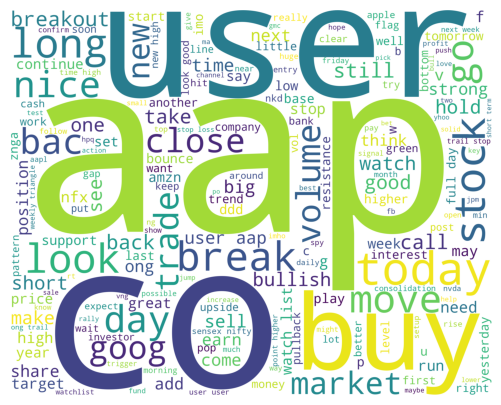

In [ ]:
print("Positive words in the Dataset")
wordcloud_draw(pos,'white')

Negative words in the Dataset


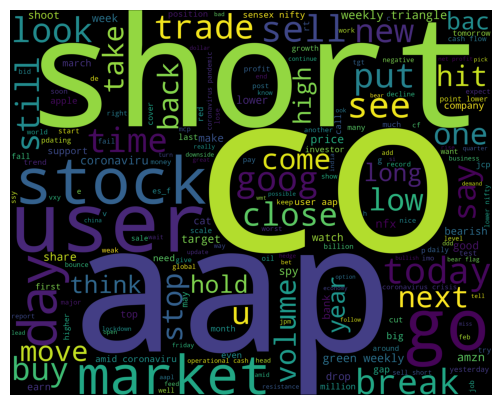

In [ ]:
print("Negative words in the Dataset")
wordcloud_draw(neg)

Visualization of the word features of the training dataset

Feature Words of the Training Dataset


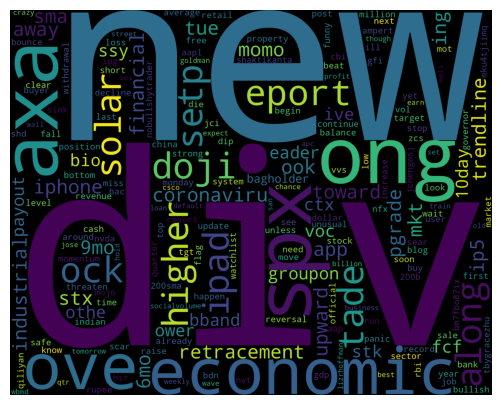

In [ ]:
print("Feature Words of the Training Dataset")
wordcloud_draw(w_features)

# **Training using NLTK's inbuilt NAIVE-BYES Estimator**

In [ ]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

Storing the prediction from the predictor in y_pred for accuracy calculation

In [ ]:
y_test = test['Sentiment']
y_pred = []
for obj in test['Text'].tolist():
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 0):                    #handling neutral sentiment
      y_pred.append(1)
    else :
      y_pred.append(res)

Calculating and printing the Confusion Matrix

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[124,  88],
       [ 41, 327]])

Text(0.5, 445.55555555555554, 'Predicted label')

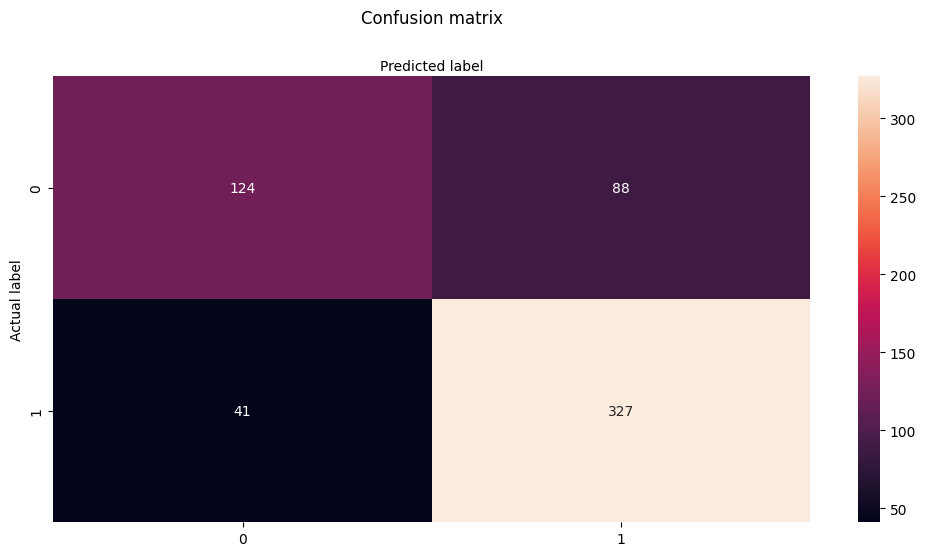

In [ ]:
import seaborn as sns
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7775862068965518
Precision: 0.7879518072289157
Recall: 0.8885869565217391


# **Sentiment extraction using TextBlob library**

In [ ]:
print(df['Text'][1])
print(df['Sentiment'][1])
Tweet = TextBlob(df['Text'][1])
Tweet.sentiment[0]

user aap movie 55 return fea gee indicator 15 trade year awesome
1


1.0

In [ ]:

y_true = df['Sentiment'].tolist()
y_pred_tb = []
for i , j in enumerate(df['Text'].tolist()):
  if int(TextBlob(j).sentiment[0]) >= 0:
    y_pred_tb.append(1)
  else :
    y_pred_tb.append(-1)

Calculating and printing the Confusion Matrix

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_true, y_pred_tb)
cnf_matrix #this method does not works very well due insufficiencnt or very subjective text

array([[  10, 2096],
       [   3, 3682]])

Text(0.5, 445.55555555555554, 'Predicted label')

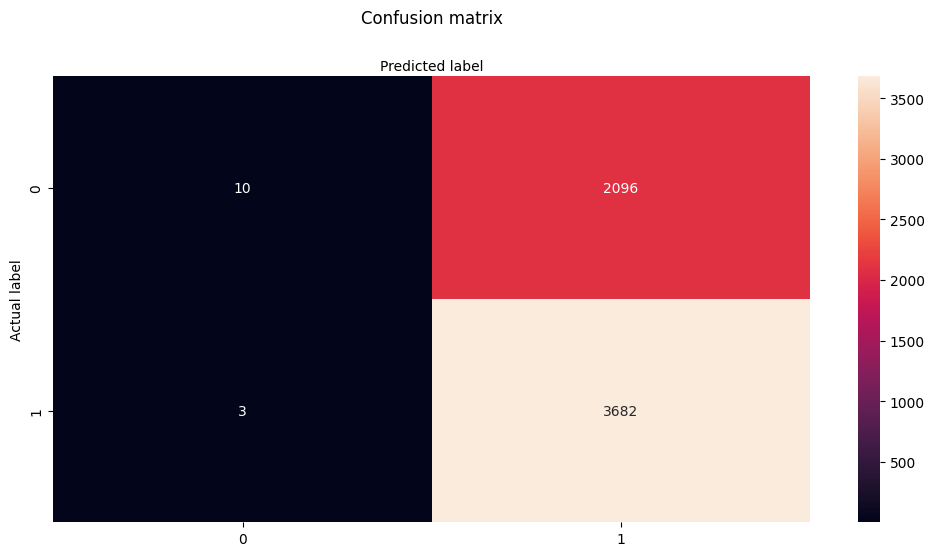

In [ ]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_true, y_pred_tb))
print("Precision:",metrics.precision_score(y_true, y_pred_tb))
print("Recall:",metrics.recall_score(y_true, y_pred_tb))  #overall accuracy is not very good as it is not good in identifying the negative samples.

Accuracy: 0.6375410119150405
Precision: 0.6372447213568709
Recall: 0.9991858887381275


# **Sentiment Analysis using Logistic Regression using TF-IDF approach**

Creating training and testing features

In [ ]:
x_train = train['Text']
y_train = train['Sentiment']
x_test = test['Text']
y_test = test['Sentiment']

In [ ]:
train.head()

,Text,Sentiment
1152,user nobullshytrader post update soon sn,1
3792,nfx short move target reversal not yet s1 ma,-1
4230,user year tgt 270 next year 60 funny unless aa...,1
755,new blog post momentum monday aap dip buyer mi...,1
1971,aap free fall 457,-1


Vectorizing the whole training dataset using words as features of the text using TF-IDF Vectorizer from sklearn

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=20000, ngram_range = (1,2))

train_data_features = vectorizer.fit_transform(x_train)

print(train_data_features.shape)

(5211, 20000)


Loading Logistic Regression model from scikit learn for classification and training

In [ ]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')

model.fit(train_data_features, y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

predicting using the Model

In [ ]:

test_data_features = vectorizer.transform(x_test)

result = model.predict(test_data_features)
y_pred_LR = result
y_test = test['Sentiment']

Calculating Confusion matrix and visualizing it

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_LR)
cnf_matrix

array([[134,  78],
       [ 44, 324]])

Text(0.5, 445.55555555555554, 'Predicted label')

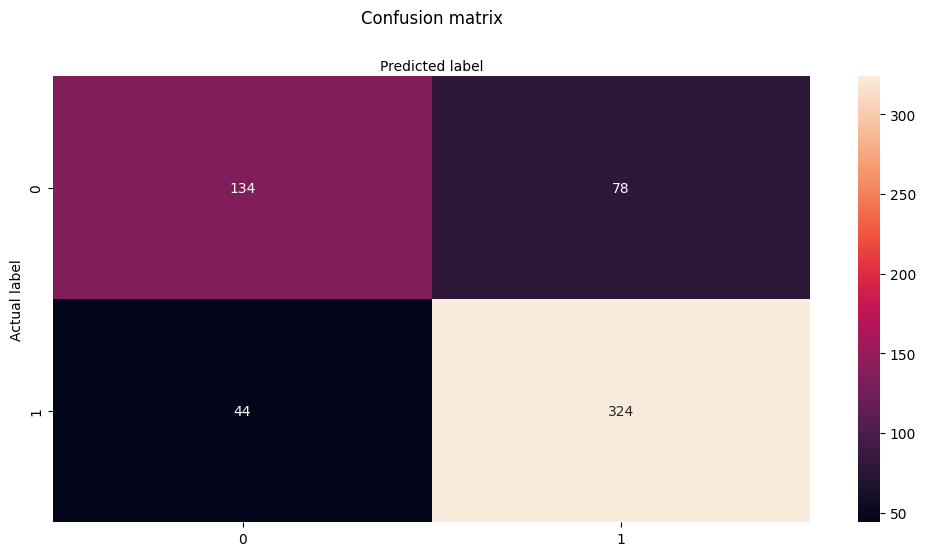

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,  color = 'Red'  ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Overall accuracy and precision recall calculation

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_LR))
print("Precision:",metrics.precision_score(y_test, y_pred_LR))
print("Recall:",metrics.recall_score(y_test, y_pred_LR)) #overall this model gives very good accuracy of 78% which is better than both NB and TextBLob

Accuracy: 0.7896551724137931
Precision: 0.8059701492537313
Recall: 0.8804347826086957
